# <span style="color:black"> Numerical Simulation Laboratory (NSL) </span>

## Francesco Gnan - <span style="color:red">  Numerical Exercises 12</span>
------------------------------------------------------------------------------------------------------------------------------

# <span style="color:red"> Introduction </span>

In this exercise we delve into Machine Learning (ML), staying within the framework of Supervised Learning (SL). Having studied the regression problem in *exercise 11*, we now deal with a **classification** problem.

In particular, we want to recognize and distinguish between the ten handwritten digits (0-9).

We will achieve this first with a **Deep Neural Network (DNN)**, then with a **Convolutional Neural Network (CNN)**

## <span style="color:red"> Convolutional Neural Networks (CNNs) </span>

Since many datasets and supervised learning tasks possess symmetries such as locality and translational invariance, CNNs were invented.
They are “translationally invariant” neural network that respects locality of the input data.

The all-to-all coupled deep neural networks typically fail to exploit these simmetries.

CNNs are built with two principal kind of layers:

  - **Convolution layer**: it computes the convolution of the input with a 
series of **filters**

  - **Pooling layers**: they coarse-grain the input while maintaining locality and spatial structure

We will be concerned with **local spatial filters** that take as inputs a small spatial patch of the previous layer at all depths. The convolution consists of running this filter over all locations in the spatial plane.

Pooling layers, as we have just said, coarse-grain spatial information by performing a subsampling at each depth. One common pooling operation is the **max pool**: the spatial dimensions are coarse-grained by replacing a small region (say 2x2 neurons) by a single neuron whose output is the maximum value of the output in the region.

The convolution and max-pool layers are generally followed by an all-to-all connected layer and a **classifier** such as a **soft-max**.

Below there is a list of the packages that will be used during this notebook:

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D

# <span style="color:red"> Exercise 12.1 </span>

In this exercise we will solve the classification problem using some DNN models.

In [2]:
seed=0    
np.random.seed(seed) 
tf.random.set_seed(seed)

We will use as data those from the **MNIST** dataset.
The data are already divided into train and test by default. The test data are more than 10% of the train data.

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("--------------------------------------")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

--------------------------------------
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


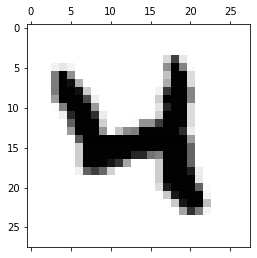

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [5]:
# reshape data
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

I build the sequential neural network with 3 layers: the 1st with 400 neurons and a relu activation function; the 2nd with 100 layers and a relu activation function; the last with 10 layers (as many as the classes into which I want to classify the data are) with a softmax activation function (it most turns on the neuron that corresponds to the element of the class to which the data is most likely to belong).

Finally, the Dropout insertion randomly turns off neurons to help the network generalize and avoid overfitting.

In [6]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [8]:
def compile_model( Opt ):
    model=create_DNN()
    if( Opt == "Sgd" ):
           model.compile(loss=keras.losses.categorical_crossentropy,
                         optimizer=SGD(),
                         metrics=['acc'])
    elif( Opt == "RMSprop" ):
           model.compile(loss='binary_crossentropy',
                        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False,name='RMSprop'),
                        metrics=['acc'])
    elif( Opt == "Adagrad"):
           model.compile(loss='binary_crossentropy',
                        optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1,epsilon=1e-07,name="Adagrad"),
                        metrics=['acc'])
    return model

We have just built multiple models that share the same neural network but possess a different optimizer:

- **Stochastic Gradient Descent (SGD)**:
    - For each example in the data it finds the value predicted by the neural network 
    - it calculates the loss from the loss function 
    - it finds partial derivatives of the loss function, these partial derivatives produce gradients
    - it uses the gradients to update the values of weights and biases and  it moves closer to the optimum value

- **RMSprop optimizer**: it is similar to the gradient descent algorithm with momentum. The difference between RMSprop and gradient descent is on how the gradients are calculated.

- **AdaGrad**: is an optimization method that allows different step sizes for different features. It increases the influence of rare but informative features i.e. it adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters. For this reason, it is well-suited for dealing with sparse data.



Let's train the models.

Shuffling the training data during training improves stability of the model. Thus, we train over a number of training epochs. Each epoch corresponds to using **all the train data** divided in minibatches.

In [11]:
batch_size = 32
epochs = 30

model_SGD = compile_model("Sgd")
model_RMSprop = compile_model("RMSprop")
model_Adagrad = compile_model("Adagrad")

In [12]:
history_SGD = model_SGD.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

In [13]:
history_RMSprop = model_RMSprop.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

In [14]:
history_Adagrad = model_Adagrad.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

We now evaluate the models' performance.
We anticipate the fact that the Droput acts only on the train and not on the test. That is why the train will be less performing.

In [16]:
# evaluate model
score_SGD = model_SGD.evaluate(X_test, Y_test, verbose=0)
score_RMSprop = model_RMSprop.evaluate(X_test, Y_test, verbose=0)
score_Adagrad = model_Adagrad.evaluate(X_test, Y_test, verbose=0)

# print performance
print("----------------------------------")
print("\n SGD:")
print('Test loss:', score_SGD[0])
print('Test accuracy:', score_SGD[1])
print("----------------------------------")
print("\n RMSprop:")
print('Test loss:', score_RMSprop[0])
print('Test accuracy:', score_RMSprop[1])
print("----------------------------------")
print("\n Adagrad:")
print('Test loss:', score_Adagrad[0])
print('Test accuracy:', score_Adagrad[1])

----------------------------------

 SGD:
Test loss: 0.06293753534555435
Test accuracy: 0.98089998960495
----------------------------------

 RMSprop:
Test loss: 0.10377031564712524
Test accuracy: 0.958899974822998
----------------------------------

 Adagrad:
Test loss: 0.07171932607889175
Test accuracy: 0.9036999940872192


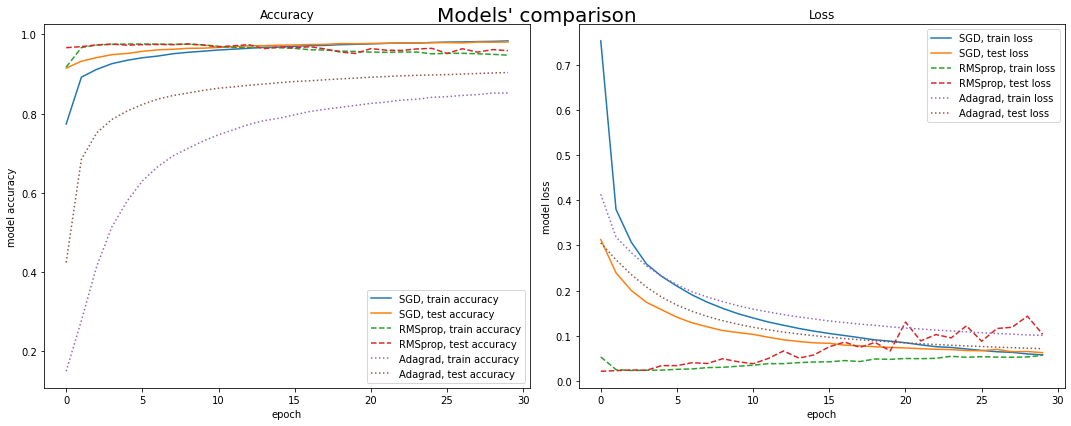

In [18]:
plt.figure(figsize=(15,6))
plt.suptitle("Models' comparison", fontsize=20)
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(history_SGD.history['acc'],label="SGD, train accuracy", linestyle="-")
plt.plot(history_SGD.history['val_acc'], label="SGD, test accuracy",linestyle="-")
plt.plot(history_RMSprop.history['acc'],label="RMSprop, train accuracy",linestyle="--")
plt.plot(history_RMSprop.history['val_acc'], label="RMSprop, test accuracy",linestyle="--")
plt.plot(history_Adagrad.history['acc'],label="Adagrad, train accuracy",linestyle=":")
plt.plot(history_Adagrad.history['val_acc'], label="Adagrad, test accuracy",linestyle=":")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(history_SGD.history['loss'],label="SGD, train loss",linestyle="-")
plt.plot(history_SGD.history['val_loss'],label="SGD, test loss",linestyle="-")
plt.plot(history_RMSprop.history['loss'],label="RMSprop, train loss",linestyle="--")
plt.plot(history_RMSprop.history['val_loss'],label="RMSprop, test loss",linestyle="--")
plt.plot(history_Adagrad.history['loss'],label="Adagrad, train loss",linestyle=":")
plt.plot(history_Adagrad.history['val_loss'],label="Adagrad, test loss",linestyle=":")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()

plt.tight_layout()
plt.show()

In the case of RMSprop, the cost function evaluated on the test set begins to rise again beyond a certain epoch. This fact may be a symptom of overfitting: the model is beginning to mimic the statistical fluctuations of the training set, thus becoming ineffective in analyzing new data, such as test data.

SGD is the best performing optimizer regarding this specific problem.

Note that we left the default parameters of RMSprop and Adagrad unchanged. Probably by modifying them appropriately the two optimizers become more efficient.





Let us now look at the prediction ability of the three models.

In [19]:
predictions_SGD = model_SGD.predict(X_test)
predictions_RMSprop = model_RMSprop.predict(X_test)
predictions_Adagrad = model_Adagrad.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

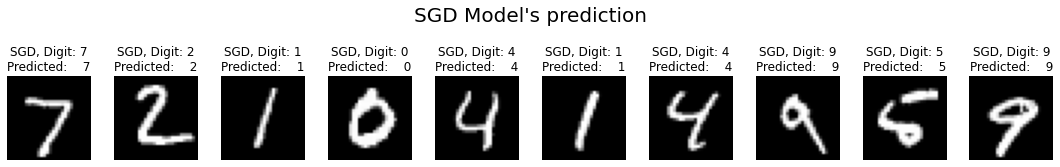

In [24]:
plt.figure(figsize=(15,6))
plt.suptitle("SGD Model's prediction", fontsize=20)
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("SGD, Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_SGD[i])))    
    plt.axis('off')
plt.tight_layout()
plt.show()

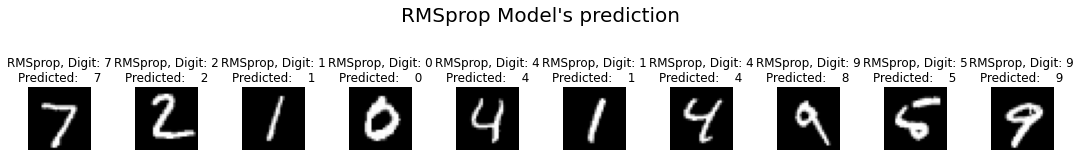

In [22]:
plt.figure(figsize=(15,6))
plt.suptitle("RMSprop Model's prediction", fontsize=20)
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("RMSprop, Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_RMSprop[i])))    
    plt.axis('off') 
plt.tight_layout()
plt.show()

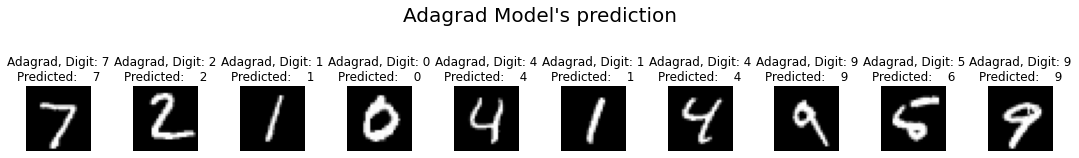

In [23]:
plt.figure(figsize=(15,6))
plt.suptitle("Adagrad Model's prediction", fontsize=20)
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Adagrad, Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_Adagrad[i])))    
    plt.axis('off') 
plt.tight_layout()
plt.show()

As we previously noted, SGD is the best predictor in this case because both RMSprop and Adagrad fail to recognize the number 5.

However, all three models perform excellent predictions.

# <span style="color:red"> Exercise 12.2 </span>

We want to solve the same problem now using a CNN.

In [37]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [38]:
def create_CNN():
    # instantiate model
    model = Sequential()

    #    1) convolution operation with 10 filters of 5x5
    model.add(Conv2D(10, kernel_size=(5, 5), 
                     activation='relu',
                     input_shape=input_shape))
    #    2) max pooling with 2x2 filter
    model.add(MaxPooling2D(2,2))
    #    3) convolution operation with 16 filters of size 5x5
    model.add(Conv2D(16, kernel_size=(5, 5), 
                     activation='relu'))
    #    4) max pooling layer with 2x2 filter
    model.add(MaxPooling2D(2,2))
    #    5) apply dropout with rate 0.5
    model.add(Dropout(0.5))
    #    6) Flatten
    model.add( Flatten() )
    #    7) fully-connected relu layer
    model.add( Dense(100, activation="relu") )
    #    8) fully-connected relu layer
    model.add( Dense(200, activation="relu") )
    #    9) soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [39]:
# training parameters
batch_size = 32
epochs = 30

# create the deep conv net
model_CNN = create_CNN()

# train CNN
history_CNN = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

In [40]:
# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0252 - acc: 0.9906

Test loss: 0.025238540023565292
Test accuracy: 0.9905999898910522


We observe that CNN works better than all three previous DNNs.

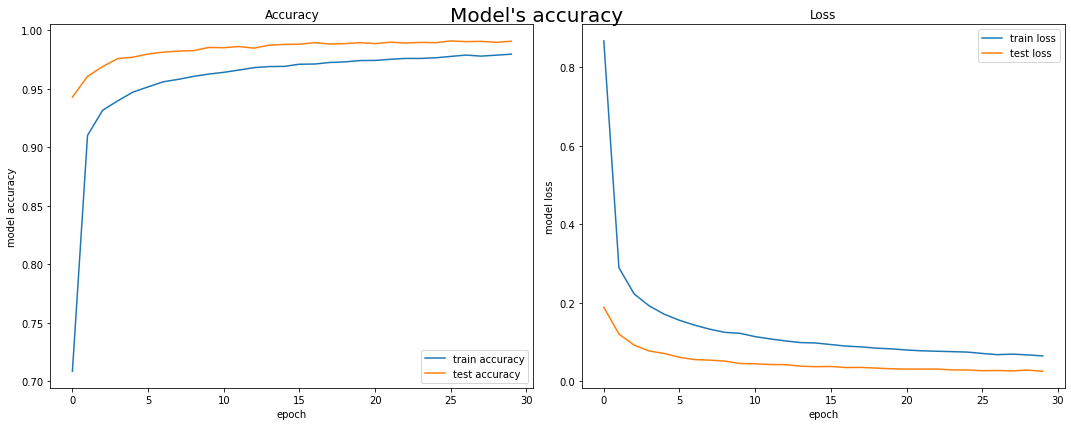

In [41]:
plt.figure(figsize=(15,6))
plt.suptitle("Model's accuracy", fontsize=20)
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(history_CNN.history['acc'],label="train accuracy", linestyle="-")
plt.plot(history_CNN.history['val_acc'], label="test accuracy",linestyle="-")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(history_CNN.history['loss'],label="train loss",linestyle="-")
plt.plot(history_CNN.history['val_loss'],label="test loss",linestyle="-")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
predictions_CNN = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

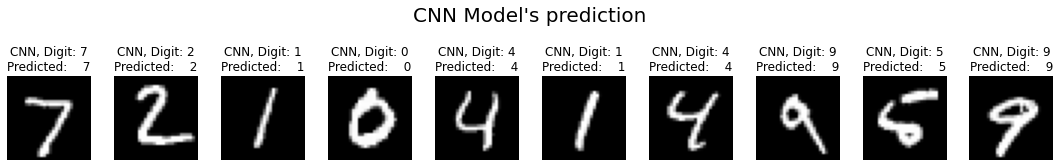

In [43]:
plt.figure(figsize=(15,6))
plt.suptitle("CNN Model's prediction", fontsize=20)
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("CNN, Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_CNN[i])))    
    plt.axis('off')
plt.tight_layout()
plt.show()